<center>
    
# Seminar 03
## (Built-ins and standard library, matplotlib, NumPy, SciPy)
<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Python-logo-notext.svg"/>

## Build-in Functions

The Python interpreter has a number of functions and types built into it that are always available. Some of them are listed in the folowing table:

|Mathematical operations||Data type||Others|
|-|-|-|-|-|
|<center> abs()||<center> bool()||<center> help()|
|<center> max()||<center> complex()||<center> input()|
|<center> min()||<center> float()||<center> len()|
|<center> pow()||<center> int()||<center> range()|
|<center> round()||<center> str()||<center> type()|
|<center> sum()||<center> list()||<center>print()|

A full list of build-ins: https://docs.python.org/3/library/functions.html

In [4]:
# n = int(input('Please input a positive number:'))
n = 5
# TODO print the sum of all numbers in the range [1,{n}]
print(sum(ii for ii in range(n+1)))
print(sum(range(1,n+1)))

15
15


## Standard library
- Reading and writing files
- Interfacing the operating system
- More data types
  - Dates and Times
 
https://docs.python.org/3/library/index.html

In [7]:
# Measuring time of a code execution
from timeit import default_timer as timer
start = timer()   # TODO
print('Doing some calculations...')
end = timer()   # TODO
print('Time duration of calculations: ', end - start, 's')

Doing some calculations...
Time duration of calculations:  0.00011329999995268736 s


In [8]:
# The same using other library
from time import perf_counter
start = perf_counter()  #TODO
print('Doing some calculations...')
end = perf_counter()   #TODO
print('Time duration of calculations: ', end - start, 's')

Doing some calculations...
Time duration of calculations:  0.0001596999999833315 s


In [9]:
# get the current working dictionary
import os
cwd = os.getcwd()   # TODO
print(cwd)

c:\githubProject\Course\Computational_Photonics


In [12]:
#TODO change the working dictionary by os.chdir
os.chdir(r'c:\githubProject\Course')
print(os.getcwd())

c:\githubProject\Course


In [13]:
#TODO change the working dictionary back to the original one
os.chdir(r'c:\githubProject\Course\Computational_Photonics')

## matplotlib: Drawing graphs
[matplotlib](https://matplotlib.org/) is a plotting library for Python. There are two ways to use it: one based on a procedural interface similar to the one of Matlab and one based on object oriented programming. We will only quickly give an introduction to the first way. If you want to use matplotlib beyond this course we recommend to study the [documentation](https://matplotlib.org/users/index.html).


Example gallery: https://matplotlib.org/stable/gallery/index.html

Matplotlib is imported in the following way:

In [16]:
import matplotlib.pyplot as plt

This is just a convention but you are _strongly_ advised to stick to it.

Most important function is ``plt.plot(x,y)``. See following example:

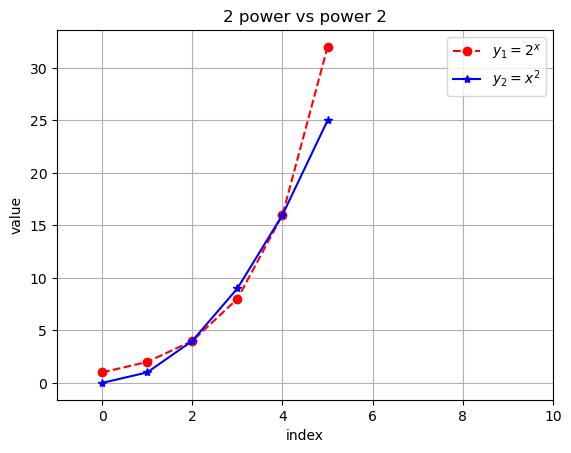

In [29]:
x = list(range(6))

y1 = []
y2 = []

for elem in x:
    y1.append(2 ** elem)
    y2.append(elem ** 2)

#TODO plot y1, y2 with different marks
plt.figure()
plt.plot(x, y1, 'ro--')
plt.plot(x, y2, 'b*-')
plt.xlabel('index')
plt.ylabel('value')
plt.title('2 power vs power 2')
plt.legend(['$y_1=2^x$', '$y_2=x^2$'])
plt.xlim(-1,10)
plt.grid()

plt.show()

As you noticed ``plot(x, y)`` function basically just plots the graph (x, y). You can provide the color and type of the graph in a string after y: the first character indicates the color (``'r'`` is for red, ``'b'`` is for blue, etc.) and then one or more characters indicate the type (``-`` is for single line, ``--`` is for dashed line, ``x`` is for crosses, ``o`` is for circles , etc.). There are a lot of additional arguments which can be provided by either their short or long name:
* ``linewidth`` or ``lw``: A floating point value which sets the linewidth (default 1.0).    
* ``color`` or ``c``: The color of the line as a single character (as above).
* ``linestyle`` or ``ls``: The type of the line (as above).
* ``label``: A string which will appear in the legend for that line (if you activate a legend).
  
Some additional useful functions:
* ``semilogx()``, ``semilogy()``: Has the same syntax as plot but sets one of the axes with a logarithmic scale.
* ``xlabel(text)`` ``ylabel(text)``: Sets the label on the x or y axis.
* ``xlims((min, max))``, ``ylims((min, max))``: Sets the limits of the x or y axis. Expects a tuple with (min, max). Call like ``plt.xlim((-1, 1))`` (note the double parentheses which indicate the tuple).
* ``grid()``: Toggles a grid on the plot.
* ``legend(text,loc)``: Activates the legend. loc is a string containing a positional argument like ``'upper left'`` or ``'lower right'``. Most of the time you go with ``'best'`` where matplotlib searches for a position where the legend does not cover the graphs.

## NumPy: Numerical Python 
[NumPy](https://numpy.org/doc/stable/) is a library for mathematical operations. It is probably at the core of most if not all scientific Python packages. NumPy provides easy-to-use, efficient, multi-dimensional arrays and [functions](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) that operate on them.

The standard import of NumPy is

In [30]:
import numpy as np

### Array creation¶

NumPy provides a new data type: ndarray (for representation of matrix!) You can create an NumPy array in many ways, for example from any sequenced Python type, e.g. a list, using the <code>np.array(object, dtype=None)</code> function:

In [31]:
# TODO check the type of a list and ndarray 
a = []
b = np.array(a)

print(type(a), type(b))


<class 'list'> <class 'numpy.ndarray'>


The datatype of an array can be accessed over the attribute dtype. At array creation it will either be deduced from the input or it can be provided with the ``dtype`` argument:

In [38]:
# TODO define np.array with different datetypes
c = []
intArray = np.array(c, dtype='uint8')
floatArray = np.array(c, dtype='float32')
complexArray = np.array(c, dtype='complex128')

print(intArray.dtype, floatArray.dtype, complexArray.dtype)

# sequence: complex -> float -> integer

uint8 float32 complex128


#### The ``ndarray`` object provides further properties: 

- ``ndim``: The number of axes (dimensions) of the array.
- ``shape``: The dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with __n__ rows and __m__ columns, shape will be ``(n,m)``. The length of the shape tuple is the number of
dimensions (``ndim``).
- ``size``: The total number of elements of the array. This is equal to the product of the elements of shape.

In [43]:
x = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
# check the properties of the ndarray
print('The number of axes (dimensions) of the array:', x.ndim) #TODO
print('The size of the array in each dimension:', x.shape) #TODO
print('The total number of elements of the array:', x.size) #TODO

The number of axes (dimensions) of the array: 2
The size of the array in each dimension: (3, 3)
The total number of elements of the array: 9


#### There are other functions that directly create an array with a specified shape:
- <code>np.zeros(shape, dtype=None)</code> - Return a new array of given shape and type, filled with zeros.
- <code>np.ones(shape, dtype=None)</code> - Return a new array of given shape and type, filled with ones.
- <code>np.arange(start, stop, stepsize)</code> - Return evenly spaced values within a given interval
- <code>np.full(shape, fillvalue, dtype=None)</code> - Return a new array of given shape and type, filled with fill_value.
- <code>np.random.rand(shape)</code> - Random values in a given shape.
- <code>np.linspace(start, stop, nSteps)</code> - Return evenly spaced numbers over a specified interval.

In [ ]:
# TODO use different functions to create an array

zeroArray = np.zeros((3, 3, 3), dtype='complex128')
oneArray = np.ones((3, 3, 3), dtype=np.float32)
fullArray = np.full((3, 3), 100)
randArray = np.random.rand(3, 3)
arangeArray = np.arange(0, 6, 2)
linespaceArray = np.linspace(0, 6, 100)
# print(zeroArray)
# print(fullArray)
# print(randArray)
# print(arangeArray)


[[[0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]]

 [[0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]]

 [[0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]
  [0.+0.j 0.+0.j 0.+0.j]]]


<!-- #### Operations on Arrays
Operations with NumPy arrays are always _element-wise_. The normal arithmetic operators (+, -, /, * and **) are available for most combinations of NumPy arrays and scalars: -->

In [71]:
a = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]])
# TODO For each element in a, subtract 1

b = a - 1
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [67]:
# TODO Square each element of a
c = a ** 2
print(c)

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


In [72]:
b = np.ones((3, 3))

# TODO matrix substraction
d = a - b
print(d)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [74]:
# TODO Multiply each corresponding element in a and b to obtain matrix c
c = a * b
print(c)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


As you can see the multiplication operator does not implement a matrix multiplication but rather the element-wise multiplication. If you want a matrix multiplication, use ``np.dot(A, B)``:

In [77]:
# TODO Matrix multiplication
dotMulti = np.dot(a, b)
dotMulti2 = a @ b
print(dotMulti)
print(dotMulti2)

[[ 6.  6.  6.]
 [15. 15. 15.]
 [24. 24. 24.]]
[[ 6.  6.  6.]
 [15. 15. 15.]
 [24. 24. 24.]]


### Indexing
The elements of a multidimensional NumPy array can be accessed by listing the indices separated by a comma in square brackets behind the array name. This is different to lists where you could only specify one index per bracket. The indexing starts with zero. Like with lists negative indices refer to elements from the end of the array. It starts with the last element which has the index -1. For example:

In [79]:
x = np.array([[0, 1, 2], 
              [3, 4, 5], 
              [6, 7, 8]])
# TODO get the value of second row, third column of x
print(x[1, 2])

5


In [81]:
# TODO get the value of third row, second column of x
print(x[2, 1])
print(x[-1, 1])

7
7


An important feature of NumPy arrays is their support for *slices*. By using the “colon operator” you can extract certain subsets from a multi-dimensional array. The notation is similar to the ``range(start, stop+1, step)`` function from Python. The slice ``n:m:step`` corresponds to selecting the indices ``n, n+step, . . . , n + k * step < m``. All parameters of a slice are optional and default to selecting the whole array. Some examples:

In [ ]:
# TODO get 1x1 submatrix from x, upper left 
print(x[0, 0])
print(x[0:1, 0:1])

[[0]]


In [83]:
# TODO get 2x2 submatrix from x, lower right
print(x[1:3, 1:3])

[[4 5]
 [7 8]]


In [84]:
# TODO get 2x2 submatrix from corner elements of x
print(x[0:3:2, 0:3:2])

[[0 2]
 [6 8]]


In [86]:
# TODO reverse on first axis
print(x[::-1, :])

[[6 7 8]
 [3 4 5]
 [0 1 2]]


**Note:** Slices return a view of the array, not a copy! Thus, on one hand they offer superior
performance for doing certain tasks (as compared to copying and creating new arrays). On the other hand there may be really unexpected problems because you are working on the same memory location as the original array.

There is also the possibility to index arrays with boolean arrays. This is rather useful for setting conditions on certain parts of the array.

In [ ]:
x = np.linspace(-1.0, 1.0, 10)
x

In [91]:
# TODO Generate y by setting values to 1 where x is between –0.5 and 0.5, and 0 elsewhere, without modifying x
y = np.zeros_like(x)
y[(x>=-0.5) & (x<=0.5)] = 1
print(y)

[[1 0 0]
 [0 0 0]
 [0 0 0]]


### Reshape/Resizing
- <code>np.reshape(array, new_shape, order)</code> - Gives a new shape to an array without changing its data.
- <code>resize(array, new_shape)</code> - Return a new array with the specified shape.
- <code>np.repeat(a, repeats, axis=None)</code> - Repeat each element of an array after themselves.
- <code>np.tile(A, reps)</code> - Construct an array by repeating A the number of times given by reps.
- <code>np.ravel(a, order='C')</code> - Return a contiguous flattened array.
  - <code>np.ndarray.flatten(order='C')</code>

In [95]:
x = np.array([[0, 1, 2], 
              [3, 4, 5], 
              [6, 7, 8]])

# TODO Return a copy of the array collapsed into one dimension.

# y = np.ravel(x)
x.flatten()
y = np.reshape(x,(1,9))
print(y)


[[0 1 2 3 4 5 6 7 8]]


### Meshgrids
There is one important function which allows to create grids of points. Consider you
want to calculate the function $z = f(x, y) = x^2 + y^2$ efficiently on an linearly spaced,
two-dimensional grid. The function meshgrid allows you to do that:

In [98]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-2, 0, 5)

# TODO calculate Z with x and y above. Hint: use np.meshgrid()#
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
print(Z)

[[5.   4.25 4.   4.25 5.  ]
 [3.25 2.5  2.25 2.5  3.25]
 [2.   1.25 1.   1.25 2.  ]
 [1.25 0.5  0.25 0.5  1.25]
 [1.   0.25 0.   0.25 1.  ]]


### Broadcasting
Broadcasting means that arrays do not necessarily have to have the same shape to be used together in calculations. Rather their shapes need to be broadcastable:

In [ ]:
x = np.ones((4, 3))
y = np.arange(3)
# y = np.arange(4) # raise error, NumPy 在对齐时会把短数组的形状看作在前面补 “1”
x + y

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [ ]:
z = np.arange(4)
# x + z # raises Error
x + z[:, None]  # 增加一个中间轴，变成(4,1)，可以广播到纵轴

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.],
       [4., 4., 4.]])

### Trigonometric functions
- <code>sin() <-> arcsin()
- <code>cos() <-> arccos()
- <code>tan() <-> arctan()
- <code>sinc()
- <code>deg2rad()/radian()
- <code>rad2deg()/degree()

In [108]:
x = np.array([[0, 1, 2], 
              [3, 4, 5], 
              [6, 7, 8]])

np.sin(x)

array([[ 0.        ,  0.84147098,  0.90929743],
       [ 0.14112001, -0.7568025 , -0.95892427],
       [-0.2794155 ,  0.6569866 ,  0.98935825]])

### Exponents and logarithms
- <code>exp()
- <code>log()
- <code>log10()

In [109]:
np.exp(x)

array([[1.00000000e+00, 2.71828183e+00, 7.38905610e+00],
       [2.00855369e+01, 5.45981500e+01, 1.48413159e+02],
       [4.03428793e+02, 1.09663316e+03, 2.98095799e+03]])

### Sums, differences
- <code>sum()
- <code>diff()

### Rounding
- <code>round()
- <code>fix()
- <code>floor()
- <code>ceil()

### Handling complex numbers
- <code>angle()
- <code>real()
- <code>imag()
- <code>conj()/conjugate()

### numpy.linalg : Linear Algebra
NumPy provides several routines for linear algebra in the submodule [linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html). We will present only the most prominent here:

- [``np.linalg.eig(array)``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html#numpy.linalg.eig) Computes the eigenvalues and right eigenvectors of a square array. It returns to arrays, the first contains the eigenvalues according to their multiplicity, the second contains the eigenvectors.
- [``np.linalg.det(array)``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.det.html#numpy.linalg.det) Compute the determinant of an array.
- [``np.linalg.inv(array)``](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv) Compute the (multiplicative) inverse of a matrix.
- ``np.linalg.solve(a,b)`` - Solve a linear matrix equation, or system of linear scalar equations.

In [110]:
# Arrays in NumPy and linear algebra
a = np.random.rand(3, 3) # 3x3 matrix with random numbers
np.linalg.det(a)

-0.0218611878810917

In [111]:
np.linalg.eig(a)

EigResult(eigenvalues=array([ 1.29527212,  0.06805912, -0.24798558]), eigenvectors=array([[-0.82707378, -0.87979203,  0.26149327],
       [-0.44898394,  0.42472756, -0.57970657],
       [-0.33817507,  0.21347712,  0.77172635]]))

In [112]:
np.linalg.inv(a)

array([[ 8.77043697, -7.32303901, -9.8391013 ],
       [-3.9854934 ,  3.07513177,  6.68956835],
       [-1.71203625,  4.04625092, -0.41291388]])

### numpy.fft: Fast Fourier Transform

The [numpy.fft](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) subpackage provides an implementation of the fast fourier transform (FFT) and several helper functions. The forward discrete Fourier transform can be performed with ``np.fft.fft(x)`` and the backward DFT with ``np.fft.ifft(x)``.

c:\Users\zihao\miniconda3\envs\Aspera\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zihao\miniconda3\envs\Aspera\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


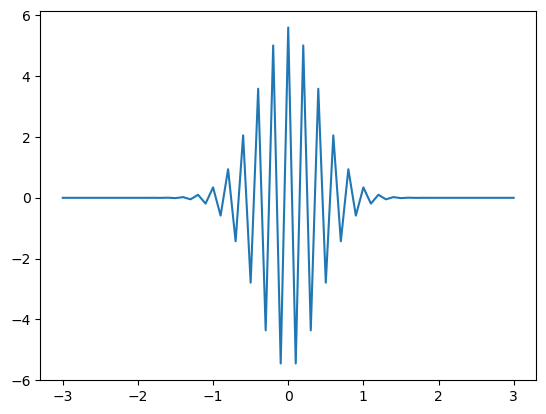

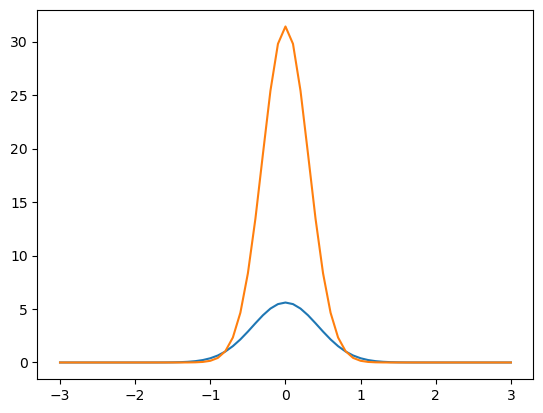

In [117]:
# Fast Fourier transform (numpy.fft)
t = np.arange(-3,3.1,.1)    # Setting t-values array
f = np.exp(-t**2/0.1)       # Gaussian pulse
# TODO Compute the one-dimensional discrete Fourier Transform.
F = np.fft.fft(f)
# TODO Shift the zero-frequency component to the center of the spectrum.
Fs = np.fft.fftshift(F)
# TODO Plot the spectrum
plt.plot(t, Fs)
plt.figure()
plt.plot(t, abs(Fs))
plt.plot(t, abs(Fs)**2)

c:\Users\zihao\miniconda3\envs\Aspera\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\zihao\miniconda3\envs\Aspera\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


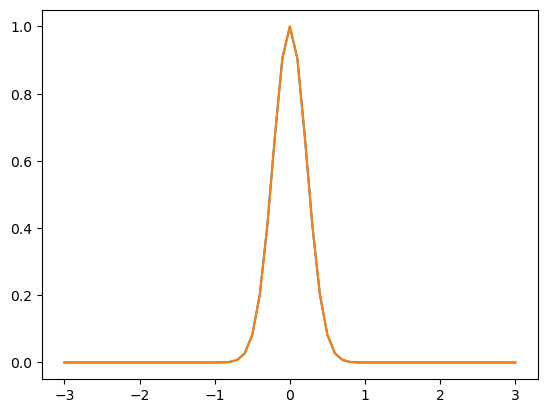

In [ ]:
f1 = np.fft.ifft(np.fft.ifftshift(Fs))
# TODO calculate the inverse fft of fft of f
# plot f and f1 in one figure to see the difference
plt.plot(t, f1)
plt.plot(t, f)

## SciPy
[SciPy](https://docs.scipy.org/doc/scipy/reference/) is an extension to Numpy for genetral scientific purposes.

In [ ]:
import scipy as sp

### Quick overview of relavent fynctions:
- Special functions (``scipy.special``), e.g. Airy function, Bessel functions, …
- Integration (``scipy.integrate``)
- Interpolation (``scipy.interpolate``)
- Optimization and root finding (``sp.optimize``)
- Fourier transform (``scipy.fft``)
- Linear algebra (``scipy.linalg``)

### Special functions (scipy.special)
Special mathematical functions can be accessed by importing [scipy.special](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html). This module contains implementations of special mathematical functions. This includes Airy functions, Bessel functions, Gamma functions, Fresnel integrals, orthogonal polynomials (Chebyshev, Laguerre, Hermitian, etc.) and spheriodal wave functions among others. All of these functions operate transparently on scalar values and
NumPy arrays.

In [ ]:
# Special functions in SciPy
x=np.linspace(0,10,1000)
# TODO calculate the 0th, 1st, 2nd order Bessel function by scipy

# TODO plot three functions in one figure

### Integration (scipy.integrate)
The [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html) package provides functions to do numerical integration. This covers integrating functions from fixed samples (trapezoidal rule, Simpson's rule or Romberg integration) but also integrating arbitrary Python functions directly (Gaussian quadrature).
Furthermore the package implements solvers for systems of ordinary differential equations (ODEs) as an initial value problem (``solve_ivp``).

In [ ]:
# Numerical integration in SciPy
def func(x):
    return x**5

# sp.integrate.quad(func, a, b) - Integrate func from a to b (possibly infinite interval: -np.inf or np.inf)
I1 = sp.integrate.quad(func, 0, 5)
print(I1)

x1 = np.arange(0,5.1,0.1)
y1 = func(x1)

I2 = sp.integrate.trapezoid(y1, x1)
print(I2)

I3 = sp.integrate.simpson(y1, x=x1)
print(I3)

### Interpolation (scipy.interpolate)
The [scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) package provides a lot of routines to do interpolation in one or
several dimensions. Very easy to use is the [``interp1d(x, y, kind)``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) function which
returns a function that interpolates the graph (x, y). The parameter kind is a string that specifies the kind of interpolation:

In [ ]:
# Data interpolation in SciPy
x = np.linspace(0, 10, 10)
func = lambda t: np.cos(-t**2/8.0)                  # try to use np.exp(np.cos(t))
y = func(x)
f1 = sp.interpolate.interp1d(x,y)
f2 = sp.interpolate.interp1d(x,y, kind='quadratic') # try to use kind='cubic'

xnew = np.linspace(0,10,50)
plt.figure()
plt.plot(x, y, 'ko', xnew, f1(xnew), 'r-', xnew, f2(xnew), 'g--', xnew, func(xnew), 'k:')
plt.legend(['data', 'linear', 'quadratic', 'theory'], loc='best')
plt.show()

### Optimization (scipy.optimize)

[``scipy.optimize``](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html) provides functionality for root-finding and minimization. For scalar minimization of a function of one variable you can use [``minimize_scalar``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar), for scalar minimization of a multivariate function use [``minimize``](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize). Both functions are a common interface to different optimization algorithms which you can choose via the ``method`` keyword argument. However, the default choice should usually work well.

In [ ]:
# Root finding in SciPy
def f1(x):
    return (x**5 - 2)

root = sp.optimize.newton(f1, 0.7, tol=1e-5)
print(root)